In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Input metadata  shape: (120, 4) type: float64
Output metadata  shape: (120,) type: int64
Possible output: [0 1 2]


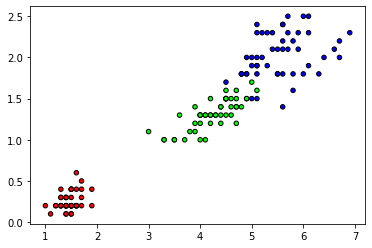

In [ ]:
print("Input metadata  shape:", X_train.shape, "type:", X_train.dtype)
print("Output metadata  shape:", Y_train.shape, "type:", Y_train.dtype)
print("Possible output:", np.unique(Y_train))

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

plt.figure()
plt.scatter(X[:,2], X[:,3], c=y, cmap=cmap, edgecolors='k', s=20)
plt.show()

In [ ]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k
    
    
    def fit(self, X, y):
        """
        Store all data as train set.

        :param X: input of train set
        :param y: target vector of train set
        :return: returns nothing
        """
        self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        """
        :param X: multiple samples to predict label
        :return: predicted label of each sample
        """
        predicted_labels = [self._predict_one(x) for x in X]
        return np.array(predicted_labels)

    def _predict_one(self, x):
        # compute distances
        distances = [self._Euclidean_dist(x, x_train) for x_train in self.X_train]
        # get k-nearest samples
        k_indices = np.argsort(distances)[:self.k]
        k_NN_labels = [self.y_train[i] for i in k_indices]
        # majority vote
        most_common = Counter(k_NN_labels).most_common(1)[0][0]
        return most_common

    def _Euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum(np.square(x1-x2)))

In [ ]:
# classifier clf
clf = KNN(k=3)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
accuracy = np.sum(predictions == Y_test) / len(Y_test)
print("Accuracy of KNN classifier is:",accuracy*100,"%")

Accuracy of KNN classifier is: 100.0 %
